# PHYS 481 Assignment 8: Poisson's Equation

### Trace Harms - (30132648) 

### Alec Lunn - (30038218) 

## Introduction 

We investigate Poisson’s Equation within an electrostatic system comprising parallel, infinitely long grounded metal plates separated by a distance of 5 centimeters. Positioned at the top and bottom of the system, these plates are interconnected along their sides through narrower metal strips, forming a rectangular channel. They are set to a constant potential of 4 Volts.

The first task is to analyze this boundary value problem using both analytic and numerical methods. To achieve this, we employ a numerical technique called Jacobi iteration. This method provides a numerical solution to Laplace's equation in 2D. The resulting solution will be visualized using a contour plot, facilitating a comparison with the derived analytic solution.

After looking at the instance with no charge density term, we move on to different scenarios involving various charge densities between the plates. Once again using the Jacobi iteration, we investigate the impact of three different charge densities to determine what variations they may have on the system.

Finally, we focus on a specific scenario where the charge density is set to a particular value. Here, we employ a direct matrix solution technique instead of Jacobi iteration. Subsequently, we compare this solution to our results from the Jacobi iteration with the same charge density.

By comparing solutions governed by Poisson’s Equation within the setup of parallel metal plates we can determine the advantages and limitations of these computational methods in modeling Poisson's Equation. Through these simulations, we aim to extend our knowledge of partial differential equations and their implications.

In [1]:
# improting relevant libraries for Assignment 8
import numpy as np
import matplotlib.pyplot as plt


Charge Density for Next Two Plots: 0 C/m^3 - Iterations: 2881


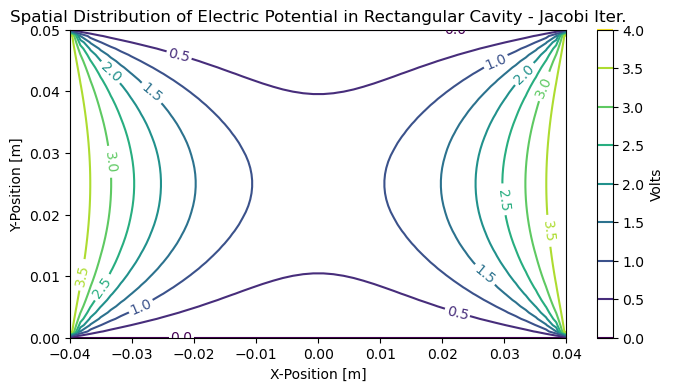

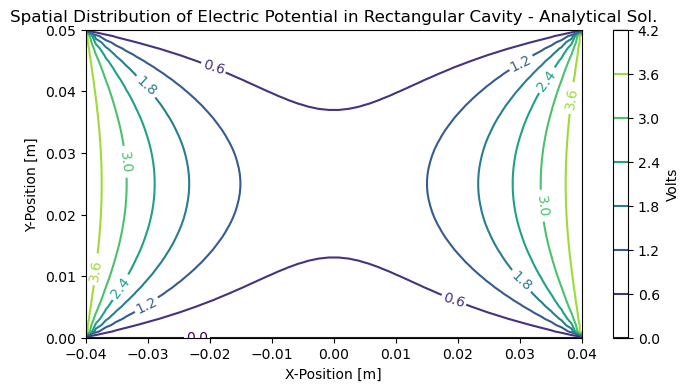

In [2]:
# Question 1
# Define parameters
a = 0.05  # Distance between plates in meters
b = 0.04  # Distance between strips in meters
V0 = 4  # Constant potential

# Grid dimensions
nx = 50  # grid points in x-direction
ny = 50  # grid points in y-direction

# Create meshgrid 
x = np.linspace(-b, b, nx)
y = np.linspace(0, a, ny)
X, Y = np.meshgrid(x, y)
# Calculate dx and dy
dx = (x[-1] - x[0])/(nx-1)
dy = (y[-1] - y[0])/(ny-1)


# Initialize potential grid
V = np.zeros((ny, nx))

# Apply boundary conditions
V[:, 0] = V0  # V = V0 at x = -b (left strip)
V[:, -1] = V0  # V = V0 at x = b (right strip)
V[0, :] = 0  # V = 0 at y = 0 (bottom plate)
V[-1, :] = 0  # V = 0 at y = a (top plate)

# Jacobi iteration
N = 10000  # Number of iterations
tolerance = 1e-5  # Convergence tolerance

def numerical_solution(V, dx, dy, tolerance):
    '''    
    Calculate charge density using the Jacobi iteration method.

    Parameters:
    V: Initial potential matrix.
    dx: Grid spacing along the x-axis.
    dy: Grid spacing along the y-axis.
    tolerance: Convergence threshold for the maximum difference between iterations.

    Returns: The converged potential matrix 
    '''

    iteration = 0
    max_diff = np.inf
    
    # Iteratively compute the charge density until the maximum difference between iterations falls below the specified tolerance.
    while max_diff > tolerance:
        V_new = V.copy()
        for j in range(1, nx - 1):
            for i in range(1, ny - 1):
                V_new[i, j] = (V[i, j - 1] / dx ** 2 + V[i, j + 1] / dx ** 2 + V[i - 1, j] / dy ** 2 + V[i + 1, j] / dy ** 2) / (2 / dx ** 2 + 2 / dy ** 2)

        # Calculate maximum difference
        max_diff = np.max(np.abs(V_new - V))
        
        V = V_new
        iteration += 1
    
    print(f"Charge Density for Next Two Plots: {0} C/m^3 - Iterations: {iteration}")
    return V_new

def analytical_solution(x, y, a, b, V0, num_terms):
    ''' Calculate the analytical solution
    
    Parameters:
    x: x-coordinates where the potential is evaluated.
    y: y-coordinates where the potential is evaluated.
    a: Width of the rectangular region along the x-axis.
    b: Height of the rectangular region along the y-axis.
    V0: Amplitude of the potential.
    num_terms: Number of terms in the sum to consider for the approximation.

    Returns: The calculated potential matrix
    '''
    result = np.float64(0.0)  
    for n in range(1, num_terms + 1, 2):
        term = (1 / n) * (np.cosh((n * np.pi * x) / a) / np.cosh((n * np.pi * b) / a)) * np.sin((n * np.pi * y) / a)
        result += term

    return np.float64(4 * V0 * result) / np.pi


# Calculate numerical solution
numerical = numerical_solution(V, dx, dy, tolerance)
# Calculate analytical solution
analytical = analytical_solution(X, Y, a, b, V0, num_terms=250)


# Plotting specifications
fig,ax=plt.subplots(1,1, figsize = (8,4))
CS= ax.contour(X, Y, numerical)
ax.clabel(CS, inline=True, fontsize=10)
fig.colorbar(CS, label='Volts')
ax.set_xlabel('X-Position [m]')
ax.set_ylabel('Y-Position [m]')
ax.set_title('Spatial Distribution of Electric Potential in Rectangular Cavity - Jacobi Iter.')
plt.show()


# Plotting specifications
fig,ax=plt.subplots(1,1, figsize = (8,4))
CS= ax.contour(X, Y, analytical)
ax.clabel(CS, inline=True, fontsize=10)
fig.colorbar(CS, label='Volts')
ax.set_xlabel('X-Position [m]')
ax.set_ylabel('Y-Position [m]')
ax.set_title('Spatial Distribution of Electric Potential in Rectangular Cavity - Analytical Sol.')
plt.show()



### Comment for Question 1

The preceding two plots display the numerical (first plot) and analytical (second plot) solutions to the spatial distribution of the electric potential within the rectangular cavity (cross-section of cavity in the xy-plane) within which there is no charge. We employed a Jacobi iteration scheme to generate the numerical solution for the electric potential feild in the cavity and performed the iterative scheme until the maximal difference between two successive numerical solutions for the field was below a tolerance level of $10^{-5}$ Volts. By inspection we conclude that the numerical and analytical solutions to the electric potential coincide. Any discrepancy between the contour lines, which are on the order of ~0.2 Volts can be attributed to subtle variation in where the contour lines have been drawn on both plots. Moreover, actual discrepancies between the analytical and numerical solutions may *likely* be attributed to the size of the discretization of the xy-plane - the accuracy of the numerical scheme is contingent on the spacing employed for computing the numerical derivatives.

One notable feature which characterizes the two preceding plots is their distinct saddle shape. Given that there's no charge within the cavity in follows that the potential field within the cavity is described by Laplace's equation (homogenous version of Gauss' Law). Moreover, since all the extrema of any solution to Laplace's equation must reside along the boundary it immediately follows that the extrema of the potential within the cavity must reside along its boundary. Thus, it is a direct consequence of the functional form of solutions to Laplace's equation that the potential field within the cavity displaces the aformentioned saddle shape.

Charge Density: 1e-09 C/m^3 - Iterations: 2890


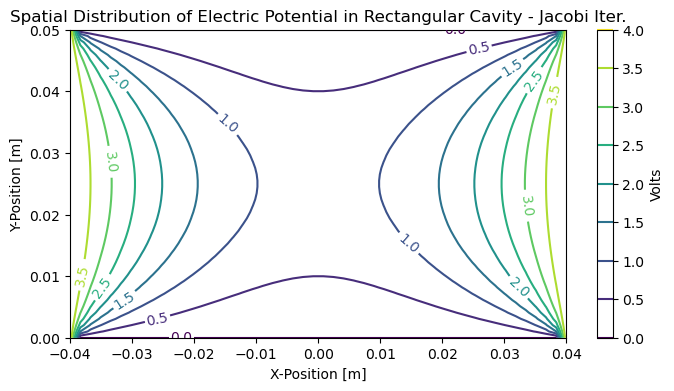

Charge Density: 1e-07 C/m^3 - Iterations: 3172


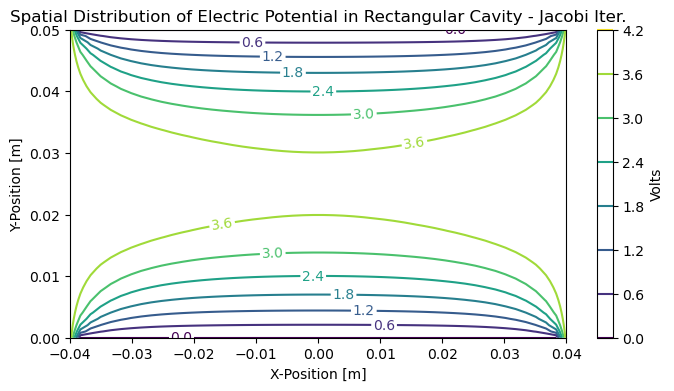

Charge Density: 1e-06 C/m^3 - Iterations: 4244


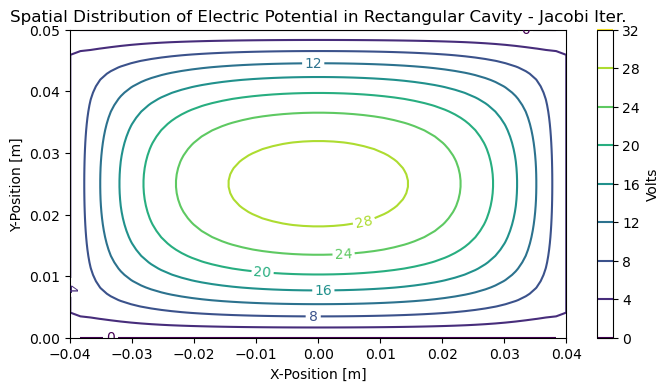

In [3]:
# Question 2
# Defining relevant constants
epsilon_0 = 8.85 * 10**-12  # C^2/(Nm^2) 
# Charge densities
rho_values = [1e-9, 1e-7, 1e-6]  # Charge densities in C/m^3: 1 nC/m^3, 100 nC/m^3, 1000 nC/m^3


# Create meshgrid for numerical solution (cross section)
x = np.linspace(-b, b, nx)
y = np.linspace(0, a, ny)
X, Y = np.meshgrid(x, y)
# Calculate dx and dy
dx = (x[-1] - x[0])/(nx-1)
dy = (y[-1] - y[0])/(ny-1)

# Initialize potential grid
V = np.zeros((nx, ny))

# Apply boundary conditions
V[0, :] = 0  # V = 0 at y = 0 (bottom plate)
V[-1, :] = 0  # V = 0 at y = a (top plate)
V[:, 0] = V0  # V = V0 at x = -b (left strip)
V[:, -1] = V0  # V = V0 at x = b (right strip)

# Jacobi iteration
N = 10000  # Number of iterations
tolerance = 1e-5  # Convergence tolerance

def numerical_solutionq2(V, dx, dy, tolerance, rho):
    '''    
    Calculate numerical solution using the Jacobi iteration method with charge density term.

    Parameters:
    V: Initial potential matrix.
    dx: Grid spacing along the x-axis.
    dy: Grid spacing along the y-axis.
    tolerance: Convergence threshold for the maximum difference between iterations.
    rho: Charge density

    Returns: The converged potential matrix 
    '''

    iteration = 0
    max_diff = np.inf
    
    # Iteratively compute the charge density until the maximum difference between iterations falls below the specified tolerance.
    while max_diff > tolerance:
        V_new = V.copy()
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                V_new[i, j] = ((rho / epsilon_0) + (V[i, j-1]/dx**2 + V[i, j+1]/dx**2 + V[i-1, j]/dy**2 + V[i+1, j]/dy**2)) / (2/dx**2 + 2/dy**2)

        # Calculate maximum difference
        max_diff = np.max(np.abs(V_new - V))
        
        V = V_new
        iteration += 1

    print(f"Charge Density: {rho} C/m^3 - Iterations: {iteration}")

    return V_new

# Calculate solution with different rho values
for rho in rho_values:
    V = numerical_solutionq2(V, dx, dy, tolerance, rho)

    # getting the electric potential field when rho = 100 nC/m^3 in order to compare in question 3
    if rho == 1e-7:
        Q2V = V

    # Plotting specifications
    fig,ax=plt.subplots(1,1, figsize = (8,4))
    CS= ax.contour(X, Y, V)
    ax.clabel(CS, inline=True, fontsize=10)
    fig.colorbar(CS, label='Volts')
    ax.set_xlabel('X-Position [m]')
    ax.set_ylabel('Y-Position [m]')
    ax.set_title('Spatial Distribution of Electric Potential in Rectangular Cavity - Jacobi Iter.')
    plt.show()



### Comment for Question 2

The preceding three plots display the solutions to the spatial distribution of the electric potential within the rectangular cavity (cross-section of cavity in the xy-plane) when the cavity is permiated with a uniform charge density of $1\,nC/m^3$, $100\,nC/m^3$, and $1000\,nC/m^3$ respectively. We employed a Jacobi iteration scheme to generate these numerical solutions for the electric potential feild in the cavity and performed the iterative scheme until the maximal difference between two successive numerical solutions for the field was below a tolerance level of $10^{-5}$ Volts.

A notable feature of these plots is that the saddle like shape of the potential field becomes progressively fainter as the charge density within the cavity is increased. This is not too suprising, indeed, as the charge density within the cavity is increased, the PDE describing the potential field (Gauss' Law) becomes increasingly inhomogenous. Thus, as the charge density within the cavity is increased, the PDE describing the potential field (Gauss' law) diverges from its Laplacian form, and as such, the prevalent features of solutions to Laplace's equation (such as the saddle shape) begin to disappear. This saddle shape is entirely gone in the third plot in which the uniform charge density within the cacvity is $1000\,nC/m^3$ and the extrema of the potential field are strongly concentrated within the center of the cavity. 

Charge Density for Next Two Plots: 1e-07 C/m^3


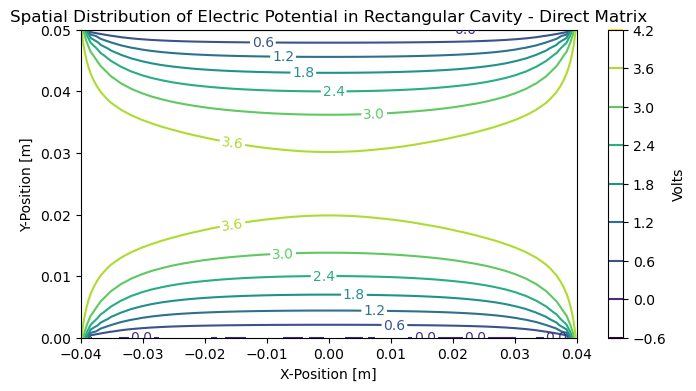

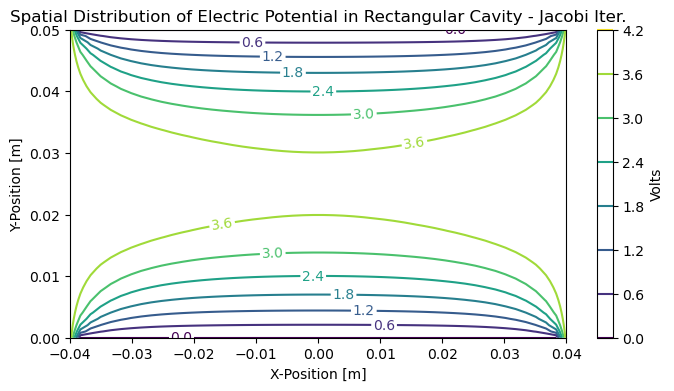

In [6]:
# Question 3
# Initialize parameters for cavity
a_len = 0.05  # Distance between plates in meters
b_len = 0.04  # Distance between strips in meters
V0 = 4  # Constant potential

# Create meshgrid for numerical solution (cross section)
x = np.linspace(-b_len, b_len, nx)
y = np.linspace(0, a_len, ny)
X, Y = np.meshgrid(x, y)

# defining parameters a, c and g for Laplacian operator 
a = 1/dx**2
c = -2/dx**2 - 2/dy**2
g = 1/dy**2

# definingn the source parameters (might seem redundant to define a rho matrix over xy-plane when each point in the plane has same rho value but I'm trying to generalize the solution for other related problems)
epsilon = 8.85*10**(-12)  # C^2/(Nm^2)
rho_value = 100e-9  # C/m^3
rho_matrix = np.zeros((nx,ny))
rho_matrix.fill(rho_value) 

def A_matrix():
    # defining the A matrix 
    A = np.zeros((nx*ny,nx*ny))
    for i in range(nx*ny):
        for j in range(nx*ny):
            # getting the i index's remainder mod ny so I can check to see if the i index corresponds to a boundary 
            r = (i+1)%ny
            # setting boundary values
            if i == j and ( i <= (nx - 1) or i >= (nx*ny - nx) or r==0 or r==1 ):
                A[i,j] = 1
            # c values of Laplacian
            if i == j and not( i <= (nx - 1) or i >= (nx*ny - nx) or r==0 or r==1 ):
                A[i,j] = c
            # g values of Laplacian
            if (i == j-nx or i == j+nx) and i > (nx - 1) and i < (nx*ny - nx) and r!=0 and r!=1:
                A[i,j] = g
            # a values of Laplacian
            if (i == j-1 or i == j+1) and i > (nx - 1) and i < (nx*ny - nx) and r!=0 and r!=1:
                A[i,j] = a
    return A

def b_matrix():
    # defining the b-matrix (vector) and then flattening using row major scheme 
    b = np.zeros(nx*ny)
    for i in range(nx):
        for j in range(ny):
            if j == 0 or j == ny-1:
                # obtaining corresponding flattened index for b matrix 
                index = i*ny + j
                b[index] = V0  # Volts
            elif i == 0 or i == nx-1:
                # obtaining corresponding flattened index for b matrix 
                index = i*ny + j
                b[index] = 0  # Volts
            else:
                # obtaining corresponding flattened index for b matrix 
                index = i*ny + j
                b[index] = -rho_matrix[i,j]/epsilon  # N/(Cm)
    return b

# Calculate matrices
A = A_matrix()
b = b_matrix()

# print statement to identify the charge density within the cavity for this problem
print(f"Charge Density for Next Two Plots: {rho_value} C/m^3")

# solving system of equations (Ax=b)
flattened_V_solution = np.linalg.solve(A, b)
V = np.reshape(flattened_V_solution, newshape=(nx,ny), order='C')

# Plotting specifications for direct matrix method
fig,ax=plt.subplots(1,1, figsize = (8,4))
CS= ax.contour(X, Y, V)
ax.clabel(CS, inline=True, fontsize=10)
fig.colorbar(CS, label='Volts')
ax.set_xlabel('X-Position [m]')
ax.set_ylabel('Y-Position [m]')
ax.set_title('Spatial Distribution of Electric Potential in Rectangular Cavity - Direct Matrix')
plt.show()

# Plotting specifications for solution from question 2 using Jacobi iteration
fig,ax=plt.subplots(1,1, figsize = (8,4))
CS= ax.contour(X, Y, Q2V)
ax.clabel(CS, inline=True, fontsize=10)
fig.colorbar(CS, label='Volts')
ax.set_xlabel('X-Position [m]')
ax.set_ylabel('Y-Position [m]')
ax.set_title('Spatial Distribution of Electric Potential in Rectangular Cavity - Jacobi Iter.')
plt.show()
        


### Comment for Question 3

The preceding two plots display two distinct numerical solutions to the spatial distribution of the electric potential within the rectangular cavity (cross-section of cavity in the xy-plane) when the cavity is permiated with a uniform charge density of $100\,nC/m^3$. The first was generate using a direct matrix solution and the second was generated in question 2 using a Jacobi iteration. As previously noted the Jacobi iteration scheme was performed until the maximal difference between two successive numerical solutions for the field was below a tolerance level of $10^{-5}$ Volts. By inspection we conclude that these distinct numerical solutions to the electric potential coincide. Remarkably, there are no discrepancies between the contour lines in both plots. Futhermore, the largest variation between both solutions is on the order of $10^{-3}$ Volts, thereby instantiating the validity of our numerical results.

### Conclusion 

In this assignment we've aimed to solve second order PDEs numerically using both the Jacobi iteration and the direct matrix techniques. In particular, we consider the second order PDE describing the spatial distribution of the electric potential within an infinitely long rectangular cavity (only xy-plane contains variation in the field). The PDE in question was none other than Gauss' law, which we considered in its homogenous form for question 1 (no charge in cavity), and in it's inhomogenous form for questions 2 and 3 (various unifrom charge densities within the cavity). 

For the homogeous case in question 1, we found that the analytical and numeric solutions to the potential exhibited a distinct saddle shape. This is entirely expected given that the extrema of solutions for Laplace's equation *must* lie along the boundary. Accordingly, all extrema in the potential field were allocated to the boundary of the cavity. In question 2, this distinct saddle shape to the potential gradually disappeared as the charge density within the cavity was increased. In particular, as the PDE describing the potential field became increasingly inhomogenous, the extrema of the potential field began to condense within the center of the cavity away from its boundary.  

We examined the validity of our numerical solutions to these variants of Gauss' law in two distinct ways. Namely, by comparing our numerical solutions to their analytical counterparts in question 1 and by cross examinig our numerical solutions as generated using the Jacobi iteration and direct matrix techniques in question 3. In both cases, we found that these independent solutions coincided, thereby instantiating our results. Moreover, we speculated that an deviation between these distinct solution methods could likely be attributed to numerical error which in large part is contingent on the size of the discretization employed in calculating our numerical derivatives. 

Overall, this assignment elucidated the utility of both the Jacobi iteration and direct matrix techniqes for solving PDEs, thereby equipping us with yet another numerical tool for solving increasingly complex PDEs which are inextricably relevant to computational physics.